# PDPBoxを用いたirisモデルの可視化

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データセットの取得

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = iris['feature_names']
target_names = iris.target_names
print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(iris.target_names)
print("shape")
print(iris['data'].shape)

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']
shape
(150, 4)


In [3]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (120, 4)
X_test.shape :  (30, 4)
y_train.shape :  (120,)
y_test.shape :  (30,)


In [4]:
X_train_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

y_label = []
for i in y_train:
    y_label.append(iris.target_names[i])
y_train_dataframe = pd.DataFrame(y_label, columns=['result'])

train_dataframe = pd.concat([X_train_dataframe, y_train_dataframe], axis=1)

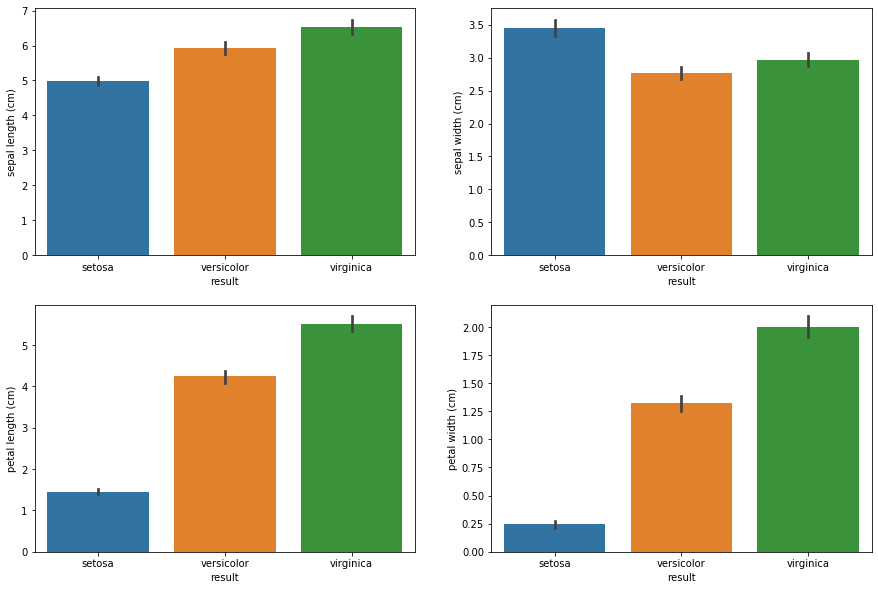

In [5]:
import seaborn as sns

fig = plt.figure(figsize=[15,10])
for i, f in enumerate(iris['feature_names']):
    fig.add_subplot(2, 2, i+1)
    sns.barplot(y=f, x='result', data= train_dataframe)

# モデルの学習と評価

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = sklearn.ensemble.RandomForestClassifier(n_estimators=2, max_depth = 3, random_state=2)
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.9666666666666667

# PDPBoxを用いたモデルの可視化

# 1特徴量と推定結果の分布表示

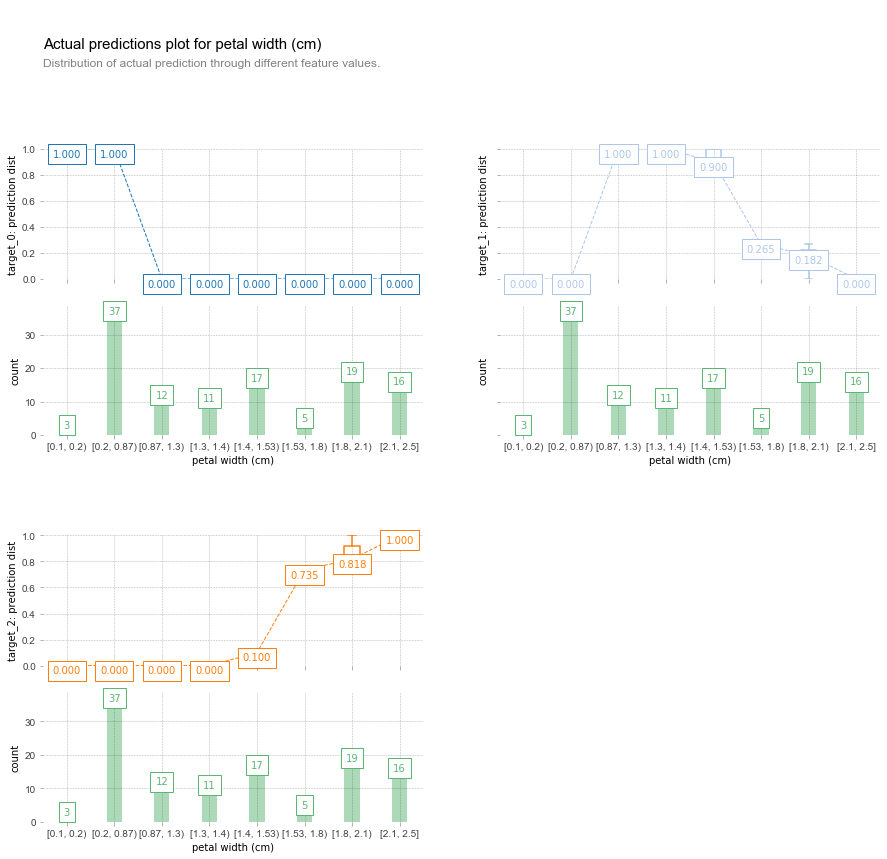

In [7]:
from pdpbox import pdp, get_dataset, info_plots

X_train_df = pd.DataFrame(X_train, columns= feature_names)

fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X=X_train_df,
    feature='petal width (cm)',
    feature_name='petal width (cm)'
)

In [8]:
summary_df

,x,display_column,value_lower,value_upper,count,actual_prediction_0_q1,actual_prediction_0_q2,actual_prediction_0_q3,actual_prediction_1_q1,actual_prediction_1_q2,actual_prediction_1_q3,actual_prediction_2_q1,actual_prediction_2_q2,actual_prediction_2_q3
0,0,"[0.1, 0.2)",0.100000,0.200000,3,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,"[0.2, 0.87)",0.200000,0.866667,37,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,"[0.87, 1.3)",0.866667,1.300000,12,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,3,"[1.3, 1.4)",1.300000,1.400000,11,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
4,4,"[1.4, 1.53)",1.400000,1.533333,17,0.0,0.0,0.0,0.900000,0.900000,1.000000,0.000000,0.100000,0.100000
5,5,"[1.53, 1.8)",1.533333,1.800000,5,0.0,0.0,0.0,0.265152,0.265152,0.265152,0.734848,0.734848,0.734848
6,6,"[1.8, 2.1)",1.800000,2.100000,19,0.0,0.0,0.0,0.083333,0.181818,0.223485,0.776515,0.818182,0.916667
7,7,"[2.1, 2.5]",2.100000,2.500000,16,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


# 1特徴量によるPartial Dependence Plot

1特徴量を増加減させた時の推定結果の変動をグラフ化

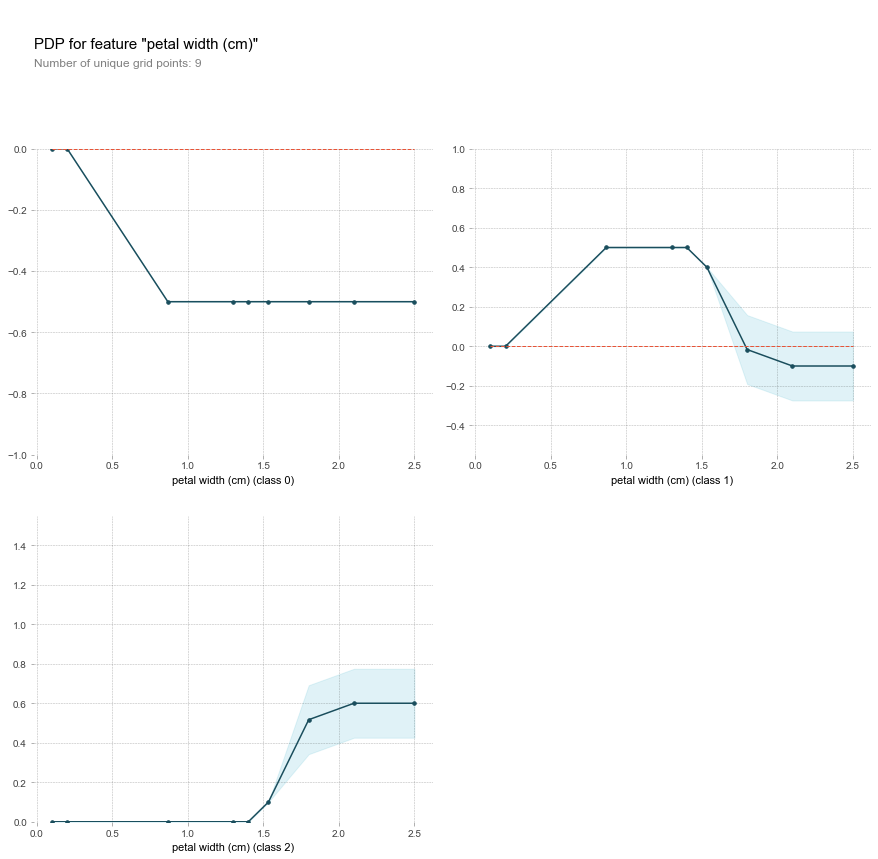

In [9]:
pdp_petal_width = pdp.pdp_isolate(
    model=model,
    dataset=X_train_df,
    model_features=feature_names,
    feature='petal width (cm)'
)

fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp_petal_width,
    feature_name='petal width (cm)',
)

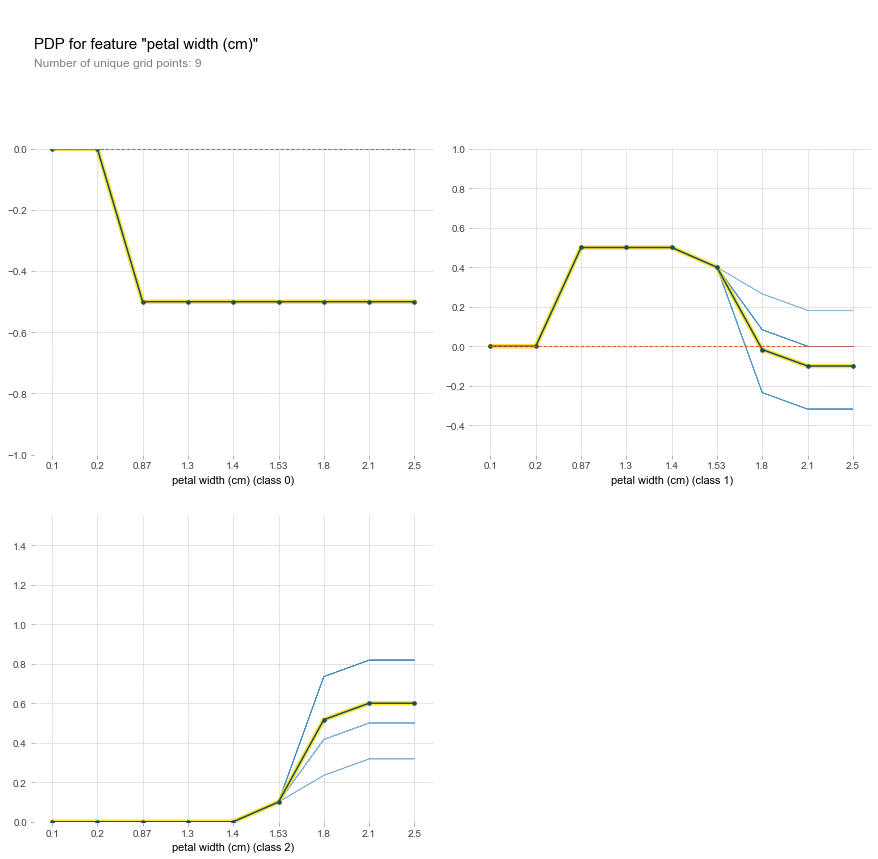

In [10]:
fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp_petal_width,
    feature_name='petal width (cm)',
    center=True,
    x_quantile=True, 
    plot_lines=True,
    frac_to_plot=100
)

# 2特徴量によるPartial Dependence Plot

2特徴量を増加減させた時の推定結果の変動をグラフ化

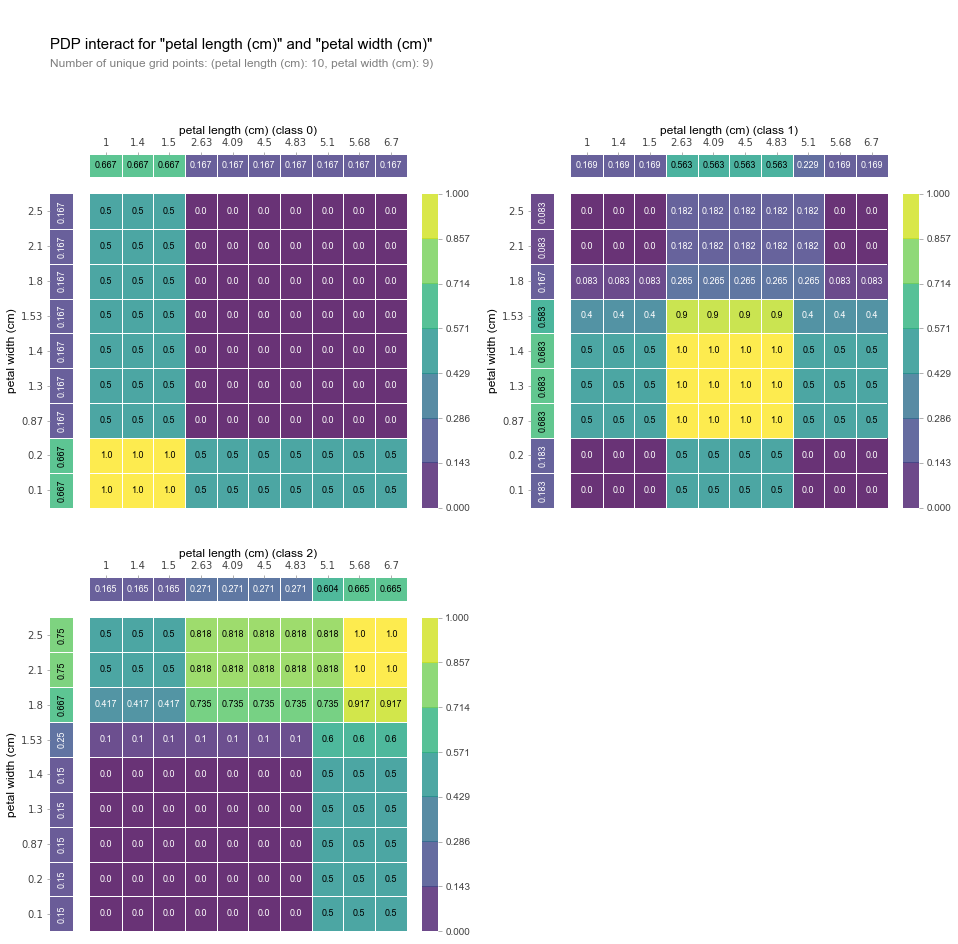

In [11]:
pdp_petal_length_width = pdp.pdp_interact(
    model=model,
    dataset=X_train_df,
    model_features=feature_names,
    features=['petal length (cm)', 'petal width (cm)'],
    num_grid_points=[10, 10]
)


fig, axes = pdp.pdp_interact_plot(
    pdp_petal_length_width,
    ['petal length (cm)', 'petal width (cm)'],
    plot_type='grid', x_quantile=True, ncols=2, plot_pdp=True, 
)